# Using Necessary Libraries

In [1]:
import pandas as pd
import numpy  as np
import cv2 as cv

# Getting Cascade Classifier

In [2]:
num_plat_classif = cv.CascadeClassifier(r'F:\AI&DS\ComputerVision\cascadeFiles\russian_number_plate.xml')

# Detect Plate

In [33]:
img = cv.imread('images/car2.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
number = num_plat_classif.detectMultiScale(img, 1.2) 
for (x,y,w,h) in number:
    roi_gray = gray[y:y+h, x:x+w] 
    roi_color = img[y:y+h, x:x+w] 
    cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 3)
    cv.imshow('Cropped', roi_color)
cv.imshow('Orignal', img)
cv.waitKey(0)

-1

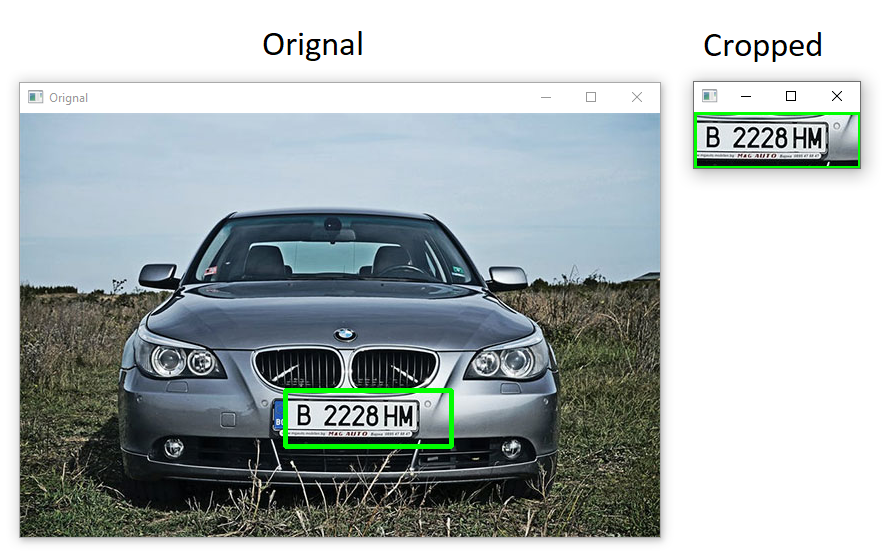

# Connecting tesseract-ocr 

In [4]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\rajee\AppData\Local\Tesseract-OCR\tesseract.exe'

# Cropping plate and extracting text 

In [ ]:
img = cv.imread('images/car13.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
number = num_plat_classif.detectMultiScale(img, 1.2) 
for (x,y,w,h) in number:
    roi_gray = gray[y:y+h, x:x+w] 
    roi_color = img[y:y+h, x:x+w] 
    cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 3)
    cv.imshow('Cropped', roi_color)

    text = pytesseract.image_to_string(roi_gray,config='--psm 11')
    print(text)
cv.imshow('Orignal', img)
cv.waitKey(0)

# Extracting Text And Reamoving Redundant Data

In [15]:
counter = 0

In [20]:
import re
patterns= [r'\w+']
img = cv.imread('images/car11.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
number = num_plat_classif.detectMultiScale(img, 1.2) 
for (x,y,w,h) in number:
    counter = counter + 1
    roi_gray = gray[y:y+h, x:x+w] 
    roi_color = img[y:y+h, x:x+w] 
    cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 3)
    cv.imshow('Cropped', roi_color)

    text = pytesseract.image_to_string(roi_gray,config='--psm 11')
    for p in patterns:
        match= re.findall(p, text)
        joined = "".join(match)
        print(joined[0])
        print('Car No. : '+str(counter))
        print('Number Plate: '+joined)
cv.imshow('Orignal', img)
cv.waitKey(0)

i
Car No. : 9
Number Plate: iKL08BH5960


IndexError: string index out of range